In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

2.3548387096774195
mean 72.6424789410349
2.9523809523809526
mean 79.17532467532467
2.761904761904762
mean 78.64340425531915
3.0161290322580645
mean 103.95282586791242


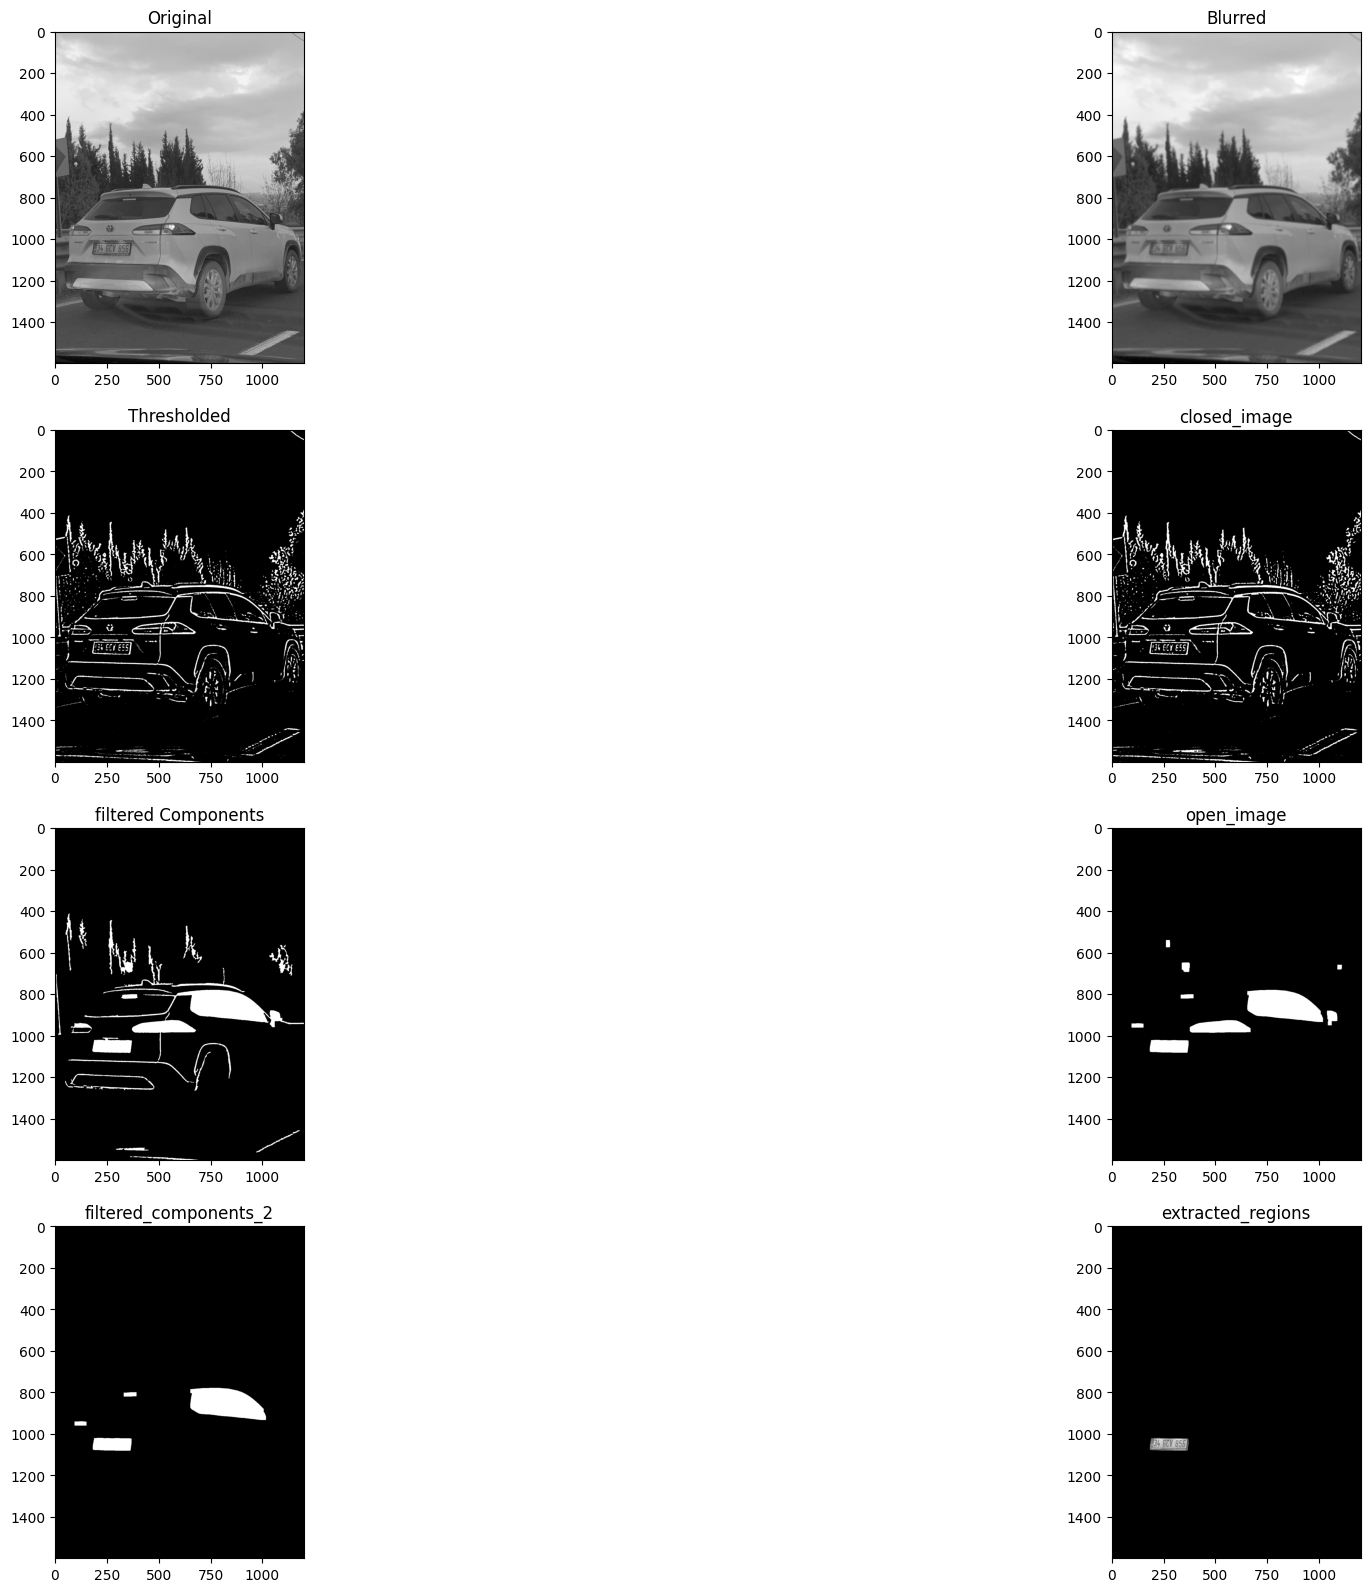

In [12]:
test_hard3 = cv2.imread('images_gray/train_images/train_medium1.jpg')

gray = cv2.cvtColor(test_hard3, cv2.COLOR_BGR2GRAY)

#blurr_kernel = (gray.shape[0] // 150) | 1, (gray.shape[1] // 150) | 1
#max_kernel = np.max(blurr_kernel), np.max(blurr_kernel)
#print("blurr_kernel", max_kernel)
blurred = cv2.GaussianBlur(gray, (19, 19), 0)

thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
thresh = cv2.bitwise_not(thresh)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 6)) # dikey çizgileri birleştirmek için 1,6
closed_image = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_image = np.zeros_like(gray)  # Create a blank image (same size as gray)
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), thickness = cv2.FILLED)  # Draw contours in white

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(contour_image, 8, cv2.CV_32S)
connected_component_image = labels.copy()
filtered_components = np.zeros(contour_image.shape, dtype=np.uint8)
for i in range(1, num_labels):
    if stats[i, cv2.CC_STAT_AREA] > 1100:
        filtered_components[labels == i] = 255

kernel_2 = cv2.getStructuringElement(cv2.MORPH_RECT, (19, 19)) # dikey çizgileri birleştirmek için
open_image = cv2.morphologyEx(filtered_components, cv2.MORPH_OPEN, kernel_2)

num_labels_2, labels_2, stats_2, centroids_2 = cv2.connectedComponentsWithStats(open_image, 8, cv2.CV_32S)
connected_component_image_2 = labels_2.copy()
filtered_components_2 = np.zeros(open_image.shape, dtype=np.uint8)

extracted_components = np.zeros_like(gray)

for i in range(1, num_labels_2):
    ratio = stats_2[i, cv2.CC_STAT_WIDTH] / stats_2[i, cv2.CC_STAT_HEIGHT]

    if 2 < ratio < 4:
        filtered_components_2[labels_2 == i] = 255
        print(ratio)
        component_mask = (labels_2 == i)

        extracted_component = gray * component_mask
        sum_of_component = np.sum(extracted_component)
        mean = sum_of_component / stats_2[i, cv2.CC_STAT_AREA]
        print("mean", mean)
        if mean > 80:
            extracted_components += extracted_component

plt.figure(figsize=(25, 25))
plt.subplot(5,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Original')

plt.subplot(5,2,2)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred')

plt.subplot(5,2,3)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded')

plt.subplot(5,2,4)
plt.imshow(closed_image, cmap='gray')
plt.title('closed_image')

plt.subplot(5,2,5)
plt.imshow(filtered_components, cmap='gray')
plt.title('filtered Components')

plt.subplot(5,2,6)
plt.imshow(open_image, cmap='gray')
plt.title('open_image')

plt.subplot(5,2,7)
plt.imshow(filtered_components_2, cmap='gray')
plt.title('filtered_components_2')

plt.subplot(5,2,8)
plt.imshow(extracted_components, cmap='gray')
plt.title('extracted_regions')

plt.show()